In [10]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display_html
import os
import sys

sys.path.append(os.getcwd() + '/modules')

%matplotlib inline


In [11]:
raw_df = pd.read_csv('Data/winemag-data-130k-v2 copy.csv')

In [12]:
nodup_df = raw_df.drop_duplicates(subset='title', keep='first')

In [13]:
nodup_df = nodup_df.drop(['Unnamed: 0', 'region_1', 'region_2', 'designation', 'description', 'taster_name', 'taster_twitter_handle', 'winery', 'title'], axis=1)

In [14]:
nodup_df.columns

Index(['country', 'points', 'price', 'province', 'variety'], dtype='object')

In [15]:
nodup_df.head()

,country,points,price,province,variety
0,Italy,87,NaN,Sicily & Sardinia,White Blend
1,Portugal,87,15.0,Douro,Portuguese Red
2,US,87,14.0,Oregon,Pinot Gris
3,US,87,13.0,Michigan,Riesling
4,US,87,65.0,Oregon,Pinot Noir


In [16]:
nodup_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118840 entries, 0 to 129970
Data columns (total 5 columns):
country     118781 non-null object
points      118840 non-null int64
price       110581 non-null float64
province    118781 non-null object
variety     118839 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 5.4+ MB


In [17]:
nodup_df = nodup_df.drop(nodup_df[nodup_df['country'].isna()].index)

In [18]:
nodup_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118781 entries, 0 to 129970
Data columns (total 5 columns):
country     118781 non-null object
points      118781 non-null int64
price       110526 non-null float64
province    118781 non-null object
variety     118780 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 5.4+ MB


In [19]:
no_price = nodup_df[nodup_df['price'].isnull()]

In [20]:
no_price.shape

(8255, 5)

In [21]:
nodup_df = nodup_df.drop(nodup_df[nodup_df['price'].isna()].index)

In [22]:
nodup_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 1 to 129970
Data columns (total 5 columns):
country     110526 non-null object
points      110526 non-null int64
price       110526 non-null float64
province    110526 non-null object
variety     110525 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 5.1+ MB


In [23]:
nodup_df.head()

,country,points,price,province,variety
1,Portugal,87,15.0,Douro,Portuguese Red
2,US,87,14.0,Oregon,Pinot Gris
3,US,87,13.0,Michigan,Riesling
4,US,87,65.0,Oregon,Pinot Noir
5,Spain,87,15.0,Northern Spain,Tempranillo-Merlot


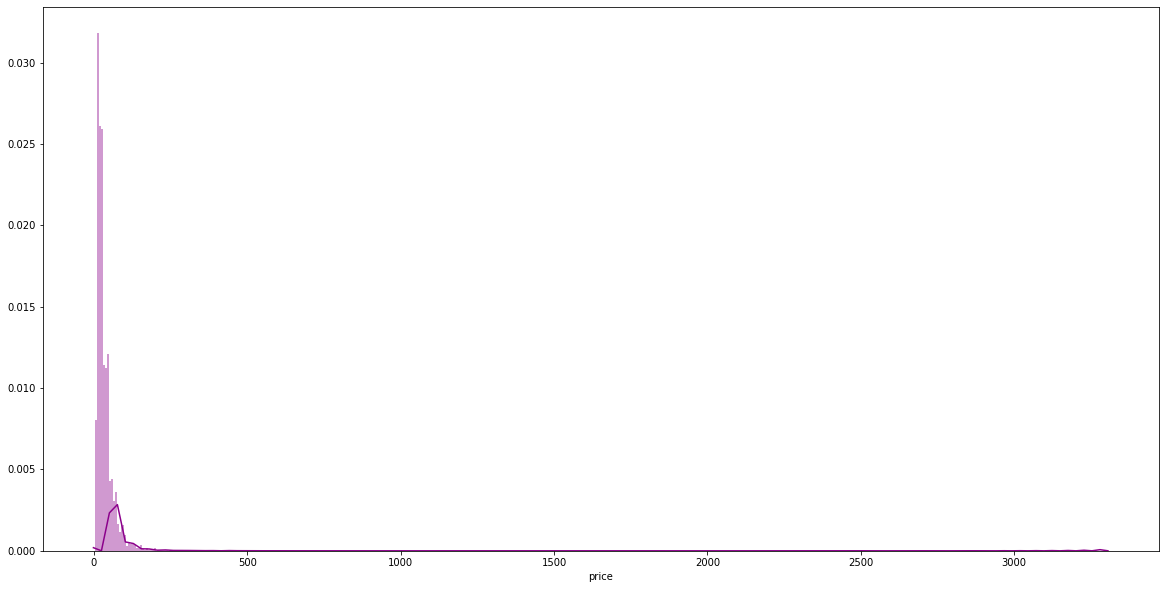

In [24]:
plt.rcParams['figure.figsize']=20,10
sns.distplot(nodup_df['price'], bins=500, color='darkmagenta')

In [25]:
clean_df = nodup_df.drop(nodup_df[nodup_df['price'] >= 200].index)

In [26]:
clean_df.shape

(109784, 5)

In [27]:
clean_df.head()

,country,points,price,province,variety
1,Portugal,87,15.0,Douro,Portuguese Red
2,US,87,14.0,Oregon,Pinot Gris
3,US,87,13.0,Michigan,Riesling
4,US,87,65.0,Oregon,Pinot Noir
5,Spain,87,15.0,Northern Spain,Tempranillo-Merlot


In [28]:
province_df = pd.DataFrame(clean_df.province.value_counts())

In [29]:
province_df.head()

,province
California,33209
Washington,7890
Oregon,4907
Tuscany,4612
Bordeaux,3527


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

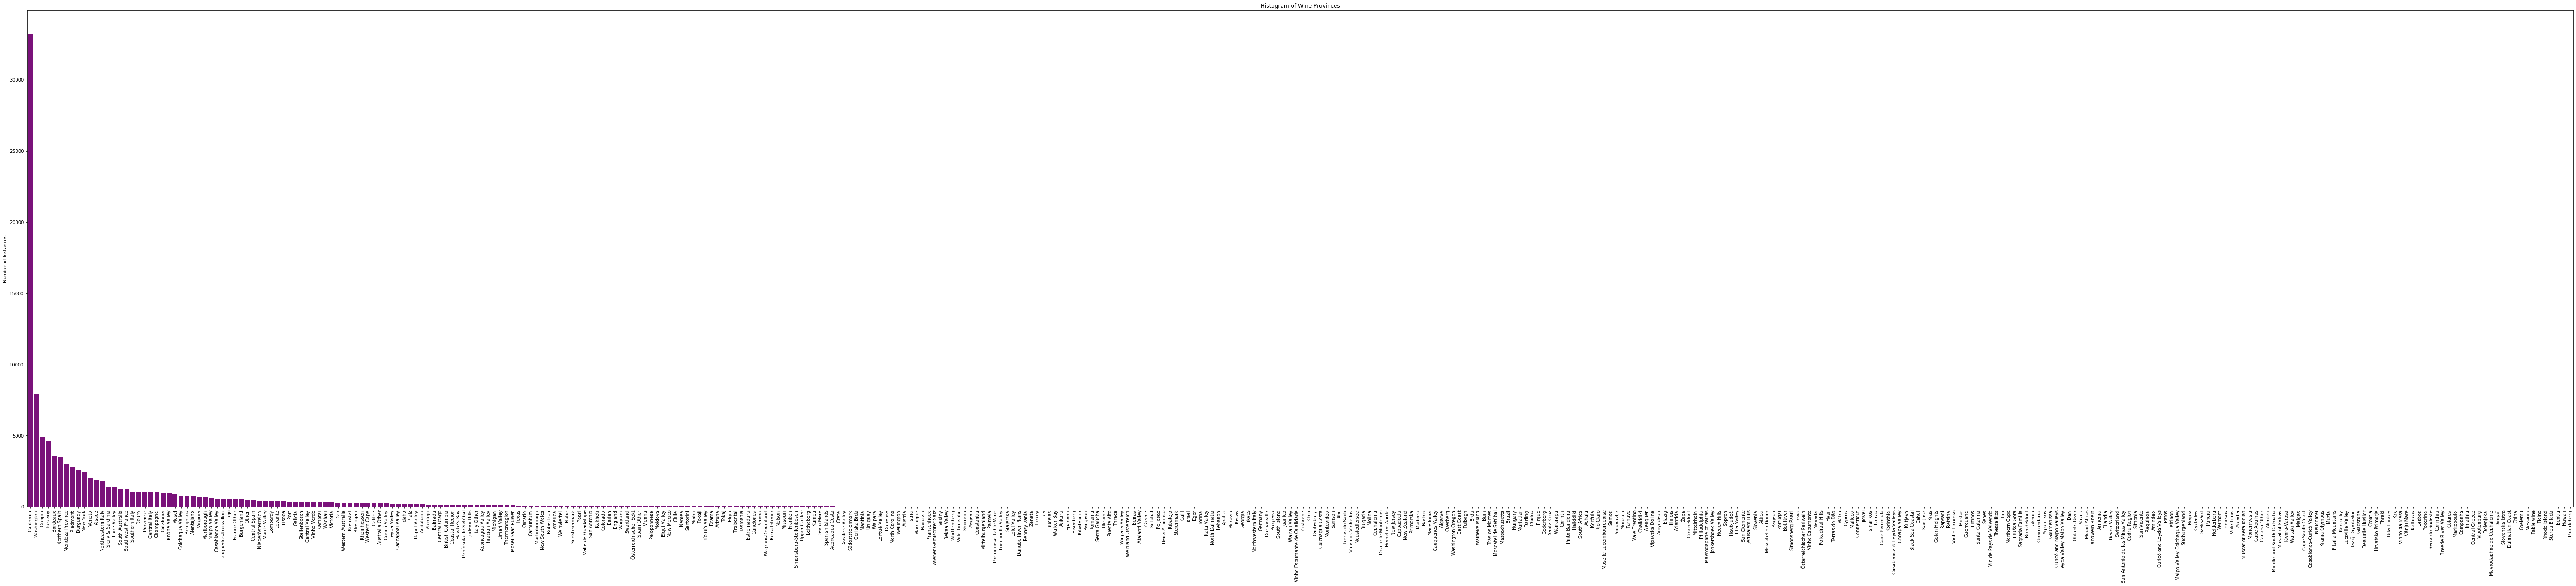

In [30]:
barplot_dims = (100, 20)
fig, ax = plt.subplots(figsize = barplot_dims)
sns.barplot(x=province_df['province'].index, y=province_df['province'], ax=ax, color='darkmagenta')

plt.title("Histogram of Wine Provinces")
plt.ylabel("Number of Instances")
#plt.xlabel("Provinces")
plt.xticks(rotation=90)
#plt.savefig('Images_Graphs/EDA_wine_provinces.png', transparent=True, dpi=150, bbox_inches='tight')

In [31]:
country_df = pd.DataFrame(clean_df.country.value_counts())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

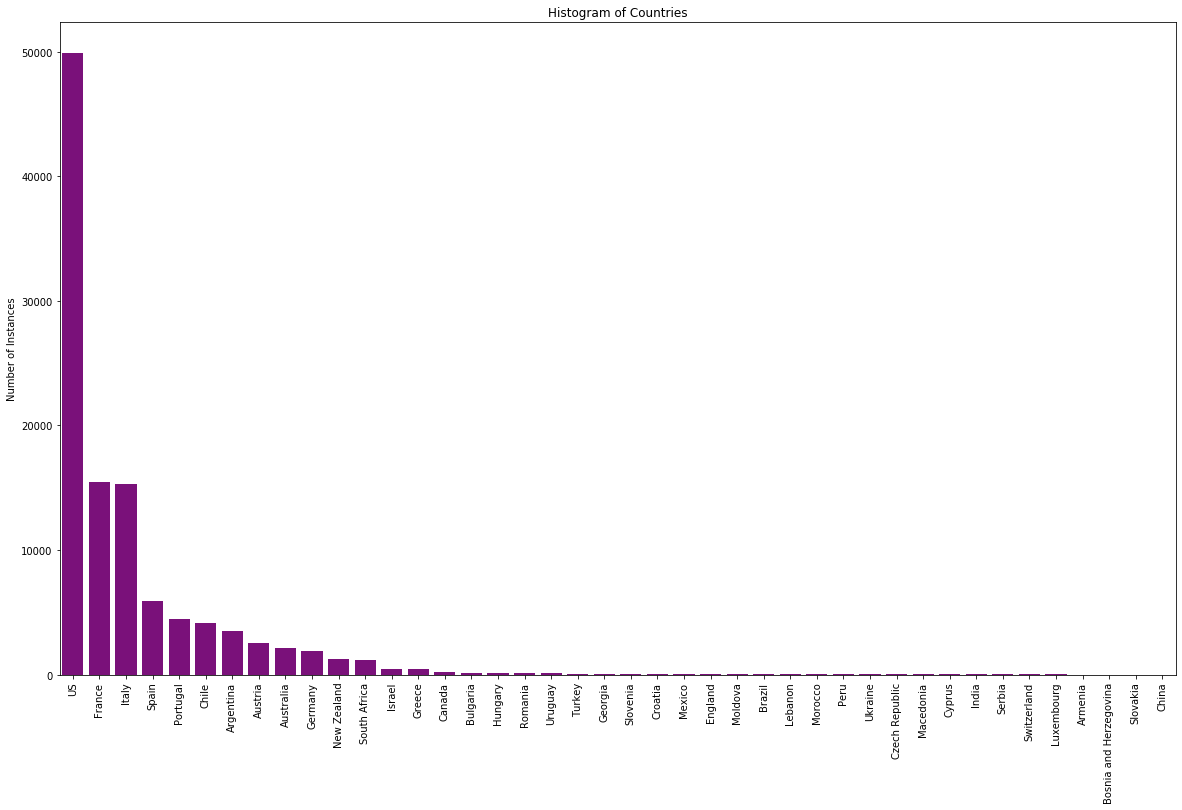

In [32]:
barplot_dims = (20, 12)
fig, ax = plt.subplots(figsize = barplot_dims)
sns.barplot(x=country_df['country'].index, y=country_df['country'], ax=ax, color='darkmagenta')

plt.title("Histogram of Countries")
plt.ylabel("Number of Instances")
#plt.xlabel("Provinces")
plt.xticks(rotation=90)
#plt.savefig('Images_Graphs/EDA_wine_provinces.png', transparent=True, dpi=150, bbox_inches='tight')

In [33]:
variety_df = pd.DataFrame(clean_df.variety.value_counts())

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

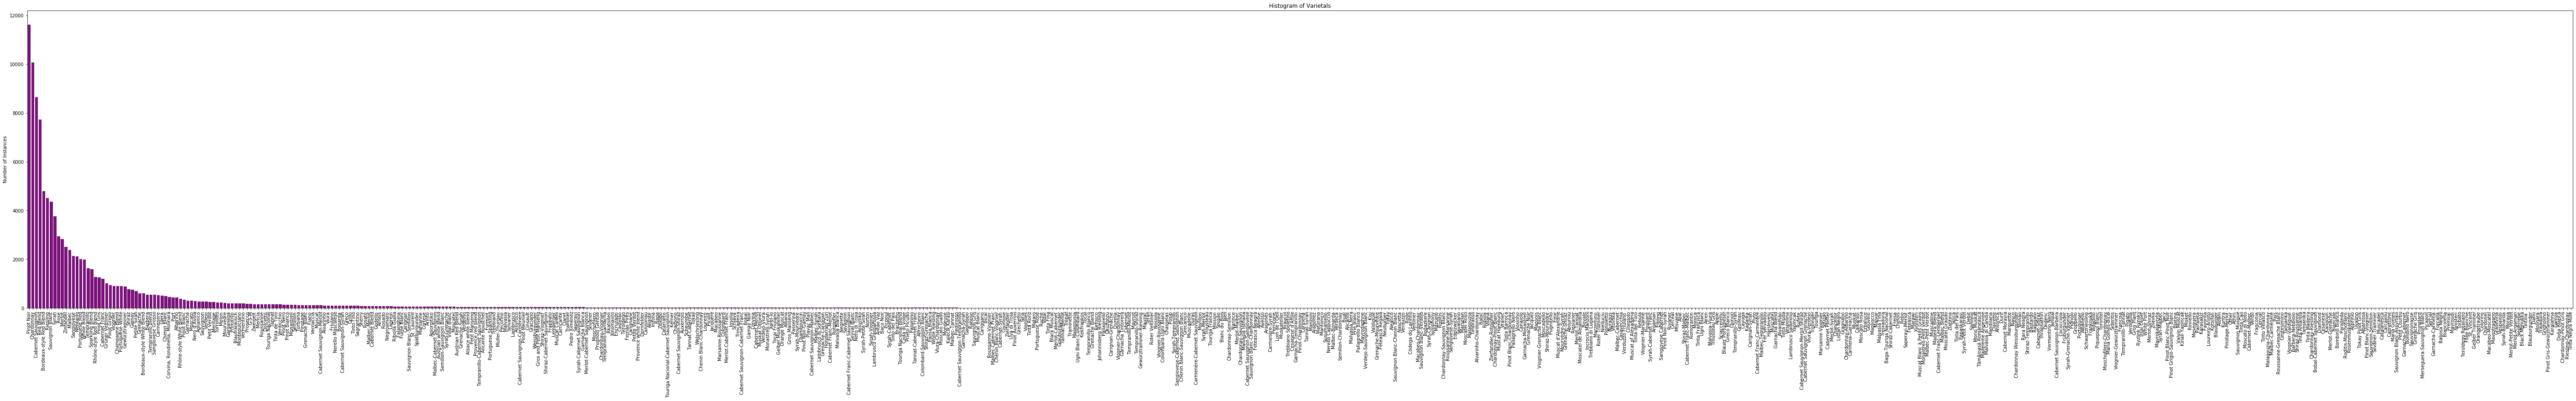

In [34]:
barplot_dims = (100, 12)
fig, ax = plt.subplots(figsize = barplot_dims)
sns.barplot(x=variety_df['variety'].index, y=variety_df['variety'], ax=ax, color='darkmagenta')

plt.title("Histogram of Varietals")
plt.ylabel("Number of Instances")
#plt.xlabel("Provinces")
plt.xticks(rotation=90)
#plt.savefig('Images_Graphs/EDA_wine_provinces.png', transparent=True, dpi=150, bbox_inches='tight')

In [35]:
display(len(set(clean_df.country)))
display(len(set(clean_df.variety)))
display(len(set(clean_df.province)))

42

690

422

In [36]:
clean_df.shape

(109784, 5)

In [37]:
clean_df.head()

,country,points,price,province,variety
1,Portugal,87,15.0,Douro,Portuguese Red
2,US,87,14.0,Oregon,Pinot Gris
3,US,87,13.0,Michigan,Riesling
4,US,87,65.0,Oregon,Pinot Noir
5,Spain,87,15.0,Northern Spain,Tempranillo-Merlot


In [38]:
data = pd.DataFrame(clean_df).groupby('variety').filter(lambda x: len(x) >= 50)


In [39]:
data.shape

(105076, 5)

In [40]:
display(len(set(data.country)))
display(len(set(data.variety)))
display(len(set(data.province)))

41

119

384

In [41]:
data.columns

Index(['country', 'points', 'price', 'province', 'variety'], dtype='object')

In [42]:
new_province = pd.DataFrame(data.province.value_counts())



In [43]:
new_varietal = pd.DataFrame(data.variety.value_counts())

In [44]:
new_country = pd.DataFrame(data.country.value_counts())

In [45]:
# barplot_dims = (20, 10)
# fig, ax = plt.subplots(figsize = barplot_dims)
# sns.barplot(x=new_province['province'].index, y=new_province['province'], ax=ax, color='darkmagenta')

# plt.title("Histogram of Wine Provinces")
# plt.ylabel("Number of Instances")
# #plt.xlabel("Provinces")
# plt.xticks(rotation=90)
# #plt.savefig('Images_Graphs/EDA_wine_provinces.png', transparent=True, dpi=150, bbox_inches='tight')

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118]), <a list of 119 Text xticklabel objects>)

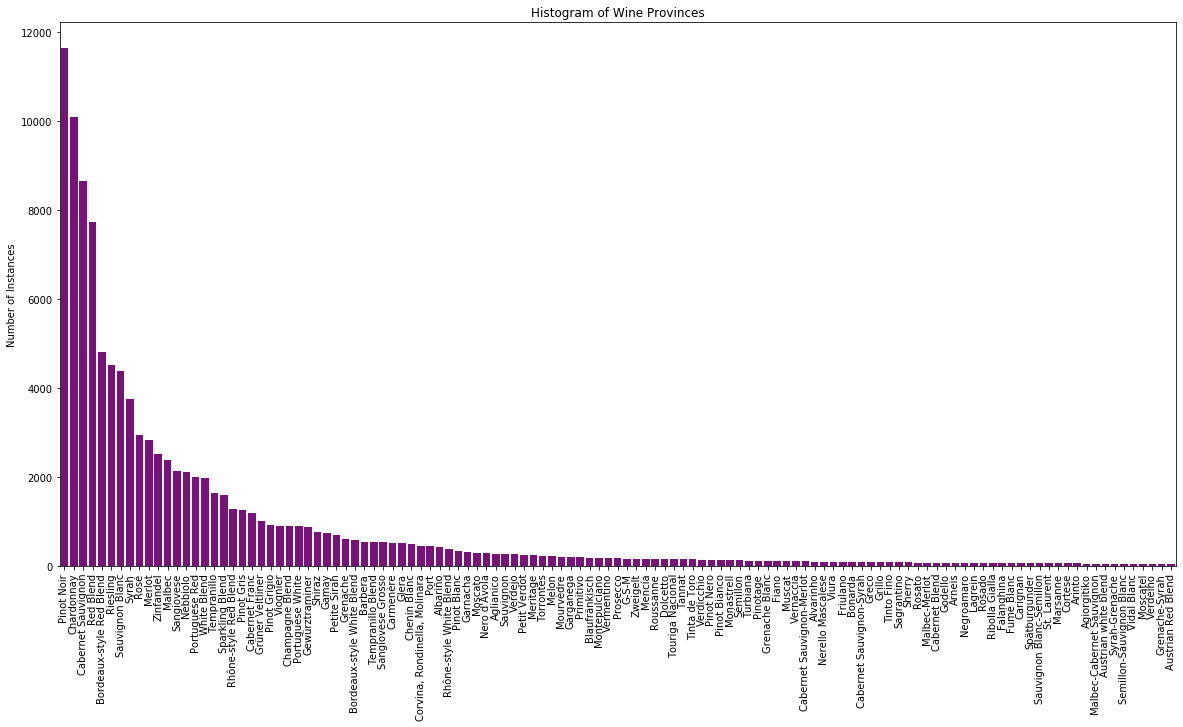

In [46]:
barplot_dims = (20, 10)
fig, ax = plt.subplots(figsize = barplot_dims)
sns.barplot(x=new_varietal['variety'].index, y=new_varietal['variety'], ax=ax, color='darkmagenta')

plt.title("Histogram of Wine Provinces")
plt.ylabel("Number of Instances")
#plt.xlabel("Provinces")
plt.xticks(rotation=90)
#plt.savefig('Images_Graphs/EDA_wine_provinces.png', transparent=True, dpi=150, bbox_inches='tight')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]), <a list of 41 Text xticklabel objects>)

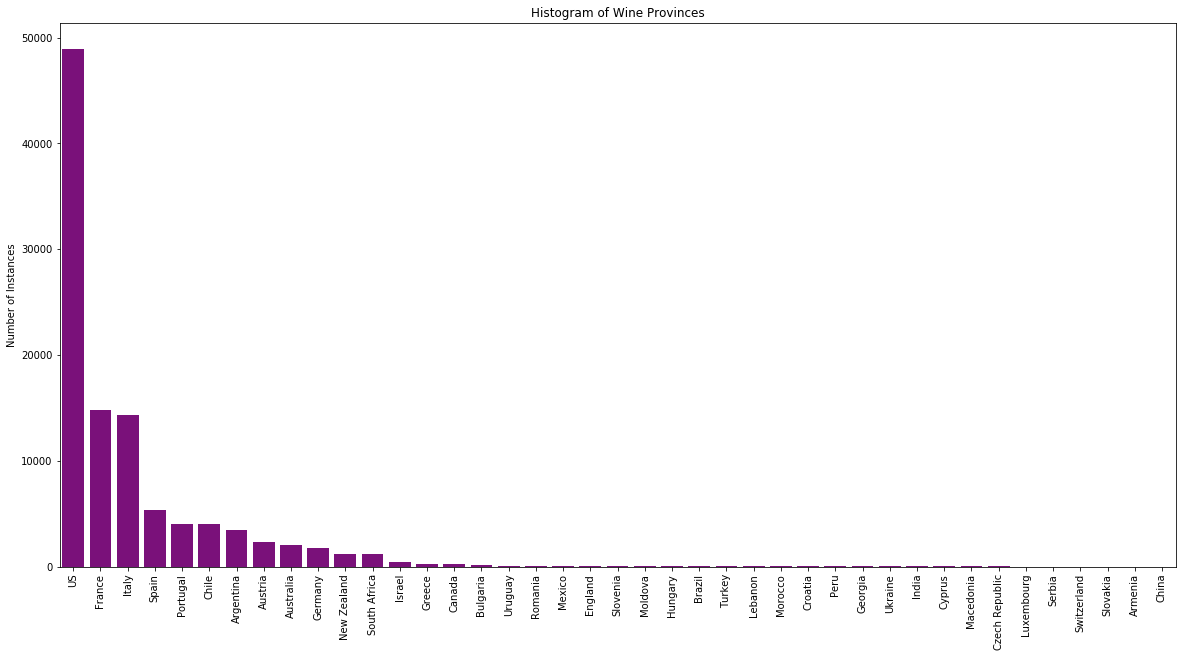

In [47]:
barplot_dims = (20, 10)
fig, ax = plt.subplots(figsize = barplot_dims)
sns.barplot(x=new_country['country'].index, y=new_country['country'], ax=ax, color='darkmagenta')

plt.title("Histogram of Wine Provinces")
plt.ylabel("Number of Instances")
#plt.xlabel("Provinces")
plt.xticks(rotation=90)
#plt.savefig('Images_Graphs/EDA_wine_provinces.png', transparent=True, dpi=150, bbox_inches='tight')

In [48]:
data.columns

Index(['country', 'points', 'price', 'province', 'variety'], dtype='object')

In [54]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [55]:
def prep_data_country(data):
    X = data.drop(['points'], axis = 1)
    y = data.points.astype(int)
    # One hot encode the provinces and varieties
    countries = pd.get_dummies(X.country)
    varieties = pd.get_dummies(X.variety)
    # Stack the matrices
    price_ = X.price.values
    X = np.hstack((countries, varieties, price_[:,None]))
    return X, y

In [56]:
def prep_data_province(data):
    X = data.drop(['points'], axis = 1)
    y = data.points.astype(int)
    # Tokenize our description before splitting
    # One hot encode the provinces and varieties
    provinces = pd.get_dummies(X.province)
    varieties = pd.get_dummies(X.variety)
    # Stack the matrices
    price_ = X.price.values
    X = np.hstack((provinces, varieties, price_[:,None]))
    return X, y

In [57]:
def prep_data_variety(data):
    X = data.drop(['points'], axis = 1)
    y = data.points.astype(int)
    # Tokenize our description before splitting
    # One hot encode the provinces and varieties
    varieties = pd.get_dummies(X.variety)
    # Stack the matrices
    price_ = X.price.values
    X = np.hstack((varieties, price_[:,None]))
    return X, y

In [58]:
def prep_data_points(data):
    X = data.drop(['variety', 'country', 'province', 'points'], axis = 1)
    y = data.points.astype(int)
    # Tokenize our description before splitting
    # One hot encode the provinces and varieties
    # Stack the matrices
    price_ = X.price.values
    return X, y

In [59]:
def try_linear_models(X_, y_, model_name, standardize = True):
    if standardize == True:
        X = preprocessing.scale(X_)
    else:
        X = X_
    X_train, X_test, y_train, y_test = train_test_split(X, y_, random_state = 42)
    if model_name == "linear":
        model = linear_model.LinearRegression().fit(X_train, y_train)
    if model_name == "ridge":
        model = linear_model.Ridge(alpha = 0.1).fit(X_train, y_train)
    if model_name == "lasso":
        model = linear_model.Lasso(alpha = 0.5).fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions, y_test

In [60]:
def error_metrics(model, predictions, y_test):
    print("Model: ", model)
    # The mean squared error
    print("--Mean squared error: %.2f" % mean_squared_error(y_test, predictions))
    # Explained variance score: 1 is perfect prediction
    print('--Variance score: %.2f' % r2_score(y_test, predictions))

In [61]:
def inspect_df(predictions, y_test):
    true_vs_pred = np.vstack((predictions, y_test))
    true_df = pd.DataFrame(true_vs_pred)
    true_df = true_df.transpose()
    true_df.columns = ["Predicted", "Actual"]
    return true_df

In [62]:
# Get model results
# Without removing any outliers
X, y = prep_data_country(data)

# With standardizing
ridge_pred_st, y_test = try_linear_models(X, y, "ridge", standardize=True)
lasso_pred_st, y_test = try_linear_models(X, y, "lasso", standardize=True)

# Without standardizing
ridge_pred, y_test = try_linear_models(X, y, "ridge", standardize=False)
lasso_pred, y_test = try_linear_models(X, y, "lasso", standardize=False)

# Error metrics
error_metrics("Ridge with standardizing", ridge_pred_st, y_test)
error_metrics("Lasso with standardizing", lasso_pred_st, y_test)

error_metrics("Ridge without standardizing", ridge_pred, y_test)
error_metrics("Lasso without standardizing", lasso_pred, y_test)

Model:  Ridge with standardizing
--Mean squared error: 6.17
--Variance score: 0.35
Model:  Lasso with standardizing
--Mean squared error: 6.90
--Variance score: 0.27
Model:  Ridge without standardizing
--Mean squared error: 6.17
--Variance score: 0.35
Model:  Lasso without standardizing
--Mean squared error: 6.65
--Variance score: 0.30


In [63]:
inspect_df(ridge_pred_st, y_test).tail(10)


,Predicted,Actual
26259,86.491905,84.0
26260,88.586482,88.0
26261,87.407504,90.0
26262,86.484012,85.0
26263,89.515227,88.0
26264,87.603243,84.0
26265,86.597847,84.0
26266,89.267075,90.0
26267,89.434470,94.0
26268,85.539950,85.0


(array([-15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.]),
 <a list of 8 Text yticklabel objects>)

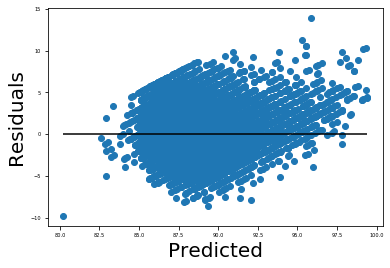

In [64]:
plt.scatter(ridge_pred_st, ridge_pred_st - y_test)
plt.hlines(y= 0, xmin = min(ridge_pred_st), xmax = max(ridge_pred_st))
plt.ylabel("Residuals", fontsize = 20)
plt.xlabel("Predicted", fontsize = 20)
plt.xticks(fontsize = 5)
plt.yticks(fontsize = 5)

In [65]:
# Get model results
# Without removing any outliers
X, y = prep_data_province(data)

# With standardizing
ridge_pred_st, y_test = try_linear_models(X, y, "ridge", standardize=True)
lasso_pred_st, y_test = try_linear_models(X, y, "lasso", standardize=True)

# Without standardizing
ridge_pred, y_test = try_linear_models(X, y, "ridge", standardize=False)
lasso_pred, y_test = try_linear_models(X, y, "lasso", standardize=False)

# Error metrics
error_metrics("Ridge with standardizing", ridge_pred_st, y_test)
error_metrics("Lasso with standardizing", lasso_pred_st, y_test)

error_metrics("Ridge without standardizing", ridge_pred, y_test)
error_metrics("Lasso without standardizing", lasso_pred, y_test)

Model:  Ridge with standardizing
--Mean squared error: 5.98
--Variance score: 0.37
Model:  Lasso with standardizing
--Mean squared error: 6.90
--Variance score: 0.27
Model:  Ridge without standardizing
--Mean squared error: 5.98
--Variance score: 0.37
Model:  Lasso without standardizing
--Mean squared error: 6.65
--Variance score: 0.30


In [66]:
inspect_df(ridge_pred_st, y_test).tail(10)


,Predicted,Actual
26259,85.656633,84.0
26260,88.858984,88.0
26261,87.351500,90.0
26262,86.283595,85.0
26263,89.793593,88.0
26264,87.594860,84.0
26265,86.886287,84.0
26266,89.202722,90.0
26267,89.750382,94.0
26268,85.456596,85.0


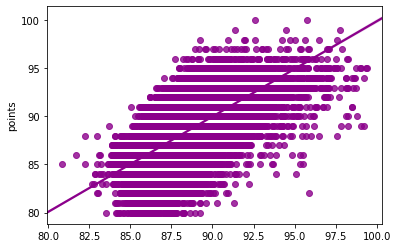

In [67]:
sns.regplot(x=ridge_pred_st, y=y_test, data=data, color='darkmagenta')

In [68]:
# Get model results
# Without removing any outliers
X, y = prep_data_variety(data)

# With standardizing
ridge_pred_st, y_test = try_linear_models(X, y, "ridge", standardize=True)
lasso_pred_st, y_test = try_linear_models(X, y, "lasso", standardize=True)

# Without standardizing
ridge_pred, y_test = try_linear_models(X, y, "ridge", standardize=False)
lasso_pred, y_test = try_linear_models(X, y, "lasso", standardize=False)

# Error metrics
error_metrics("Ridge with standardizing", ridge_pred_st, y_test)
error_metrics("Lasso with standardizing", lasso_pred_st, y_test)

error_metrics("Ridge without standardizing", ridge_pred, y_test)
error_metrics("Lasso without standardizing", lasso_pred, y_test)

Model:  Ridge with standardizing
--Mean squared error: 6.29
--Variance score: 0.34
Model:  Lasso with standardizing
--Mean squared error: 6.90
--Variance score: 0.27
Model:  Ridge without standardizing
--Mean squared error: 6.29
--Variance score: 0.34
Model:  Lasso without standardizing
--Mean squared error: 6.65
--Variance score: 0.30


In [69]:
inspect_df(ridge_pred_st, y_test).tail(10)

,Predicted,Actual
26259,86.376952,84.0
26260,88.478518,88.0
26261,87.308953,90.0
26262,86.364390,85.0
26263,89.334201,88.0
26264,87.595769,84.0
26265,87.757642,84.0
26266,89.336048,90.0
26267,89.431976,94.0
26268,85.622040,85.0


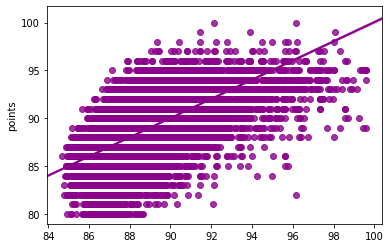

In [70]:
sns.regplot(x=ridge_pred_st, y=y_test, data=data, color='darkmagenta')

In [71]:
# Get model results
# Without removing any outliers
X, y = prep_data_points(data)

# With standardizing
ridge_pred_st, y_test = try_linear_models(X, y, "ridge", standardize=True)
lasso_pred_st, y_test = try_linear_models(X, y, "lasso", standardize=True)

# Without standardizing
ridge_pred, y_test = try_linear_models(X, y, "ridge", standardize=False)
lasso_pred, y_test = try_linear_models(X, y, "lasso", standardize=False)

# Error metrics
error_metrics("Ridge with standardizing", ridge_pred_st, y_test)
error_metrics("Lasso with standardizing", lasso_pred_st, y_test)

error_metrics("Ridge without standardizing", ridge_pred, y_test)
error_metrics("Lasso without standardizing", lasso_pred, y_test)

Model:  Ridge with standardizing
--Mean squared error: 6.64
--Variance score: 0.30
Model:  Lasso with standardizing
--Mean squared error: 6.90
--Variance score: 0.27
Model:  Ridge without standardizing
--Mean squared error: 6.64
--Variance score: 0.30
Model:  Lasso without standardizing
--Mean squared error: 6.65
--Variance score: 0.30


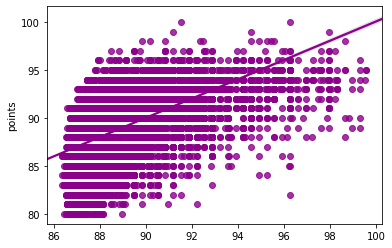

In [73]:
sns.regplot(x=ridge_pred_st, y=y_test, data=data, color='darkmagenta')

In [74]:
import statsmodels.api as sm

data['target'] = data.price
target = data['target']

In [76]:
# X = data["points", "province", "variety"]
# y = target
# X = sm.add_constant(X)

In [77]:


model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 points   R-squared (uncentered):                   0.668
Model:                            OLS   Adj. R-squared (uncentered):              0.668
Method:                 Least Squares   F-statistic:                          2.110e+05
Date:                Fri, 24 Jan 2020   Prob (F-statistic):                        0.00
Time:                        12:41:59   Log-Likelihood:                     -5.6224e+05
No. Observations:              105076   AIC:                                  1.124e+06
Df Residuals:                  105075   BIC:                                  1.124e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price          1.7269      0.004    459.358      0.000       1.719       1.734
==============================================================================
Omnibus:                    50412.972   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           313857.008
Skew:                          -2.266   Prob(JB):                         0.00
Kurtosis:                      10.152   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

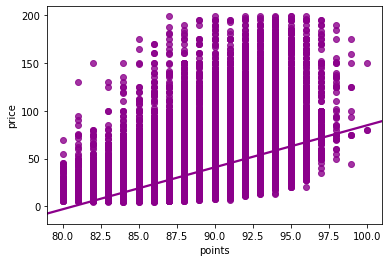

In [78]:
sns.regplot(x=data["points"], y=data["price"], data=data, color='darkmagenta')

In [79]:
#under_100 = nodup_df.drop(nodup_df[nodup_df['price'] >= 51].index)

In [80]:
#data_u100 = under_100[under_100.groupby('variety').variety.transform(len) >= 200]

In [ ]:
#data_u100 = data_u100[data_u100.groupby('country').country.transform(len) >= 100]

In [ ]:
# display(len(data_u100.variety.value_counts()))
# display(len(data_u100.province.value_counts()))
# display(len(data_u100.country.value_counts()))

In [ ]:
# # Get model results
# # Without removing any outliers
# X, y = prep_data_country(data_u100)

# # With standardizing
# ridge_pred_st, y_test = try_linear_models(X, y, "ridge", standardize=True)
# lasso_pred_st, y_test = try_linear_models(X, y, "lasso", standardize=True)

# # Without standardizing
# ridge_pred, y_test = try_linear_models(X, y, "ridge", standardize=False)
# lasso_pred, y_test = try_linear_models(X, y, "lasso", standardize=False)

# # Error metrics
# error_metrics("Ridge with standardizing", ridge_pred_st, y_test)
# error_metrics("Lasso with standardizing", lasso_pred_st, y_test)

# error_metrics("Ridge without standardizing", ridge_pred, y_test)
# error_metrics("Lasso without standardizing", lasso_pred, y_test)

In [ ]:
# sns.regplot(x=ridge_pred_st, y=y_test, data=data_u100)

In [ ]:
# # Get model results
# # Without removing any outliers
# X, y = prep_data_province(data_u100)

# # With standardizing
# ridge_pred_st, y_test = try_linear_models(X, y, "ridge", standardize=True)
# lasso_pred_st, y_test = try_linear_models(X, y, "lasso", standardize=True)

# # Without standardizing
# ridge_pred, y_test = try_linear_models(X, y, "ridge", standardize=False)
# lasso_pred, y_test = try_linear_models(X, y, "lasso", standardize=False)

# # Error metrics
# error_metrics("Ridge with standardizing", ridge_pred_st, y_test)
# error_metrics("Lasso with standardizing", lasso_pred_st, y_test)

# error_metrics("Ridge without standardizing", ridge_pred, y_test)
# error_metrics("Lasso without standardizing", lasso_pred, y_test)

In [ ]:
# sns.regplot(x=ridge_pred_st, y=y_test, data=data_u100)

In [ ]:
# # Get model results
# # Without removing any outliers
# X, y = prep_data_variety(data_u100)

# # With standardizing
# ridge_pred_st, y_test = try_linear_models(X, y, "ridge", standardize=True)
# lasso_pred_st, y_test = try_linear_models(X, y, "lasso", standardize=True)

# # Without standardizing
# ridge_pred, y_test = try_linear_models(X, y, "ridge", standardize=False)
# lasso_pred, y_test = try_linear_models(X, y, "lasso", standardize=False)

# # Error metrics
# error_metrics("Ridge with standardizing", ridge_pred_st, y_test)
# error_metrics("Lasso with standardizing", lasso_pred_st, y_test)

# error_metrics("Ridge without standardizing", ridge_pred, y_test)
# error_metrics("Lasso without standardizing", lasso_pred, y_test)

In [ ]:
# sns.regplot(x=ridge_pred_st, y=y_test, data=data_u100)

In [ ]:
# # Get model results
# # Without removing any outliers
# X, y = prep_data_points(data_u100)

# # With standardizing
# ridge_pred_st, y_test = try_linear_models(X, y, "ridge", standardize=True)
# lasso_pred_st, y_test = try_linear_models(X, y, "lasso", standardize=True)

# # Without standardizing
# ridge_pred, y_test = try_linear_models(X, y, "ridge", standardize=False)
# lasso_pred, y_test = try_linear_models(X, y, "lasso", standardize=False)

# # Error metrics
# error_metrics("Ridge with standardizing", ridge_pred_st, y_test)
# error_metrics("Lasso with standardizing", lasso_pred_st, y_test)

# error_metrics("Ridge without standardizing", ridge_pred, y_test)
# error_metrics("Lasso without standardizing", lasso_pred, y_test)

In [ ]:
# sns.regplot(x=ridge_pred_st, y=y_test, data=data_u100)

In [ ]:
# data_u100['target'] = data_u100.price
# target = data_u100['target']

In [ ]:
# X = data_u100["points"]
# y = target
# X = sm.add_constant(X)

# model = sm.OLS(y, X).fit()
# predictions = model.predict(X) # make the predictions by the model

# # Print out the statistics
# model.summary()

In [ ]:
# sns.regplot(x=data_u100["points"], y=data_u100["price"], data=data_u100)

In [ ]:
# data_u100.shape
